<a href="https://colab.research.google.com/github/nindob/breast_cancer-detection/blob/master/Science_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
#Classification of cancer dignosis
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [89]:
#importing the dataset 
#load data
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('data.csv')
df.head(7)

Saving data.csv to data (3).csv


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.1127,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN


In [90]:
#Count the number of coloumns and rows in the data set
df.shape

(569, 33)

In [91]:
#Count the number of empty values, (NaN, na, NAN) in each column
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [0]:
#Drop last coloumn with missing values
df = df.dropna(axis=1)

In [93]:
#Get the new count of the number of rows and columns
df.shape

(569, 32)

In [94]:
#Get a count of the number of Malignant (M) or Bengin (B) cells
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

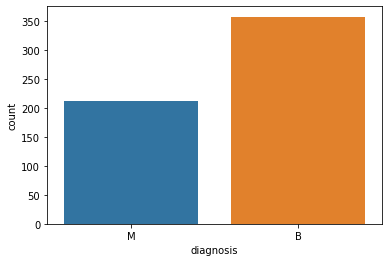

In [95]:
#Visualize the count
sns.countplot(df['diagnosis'], label='count')

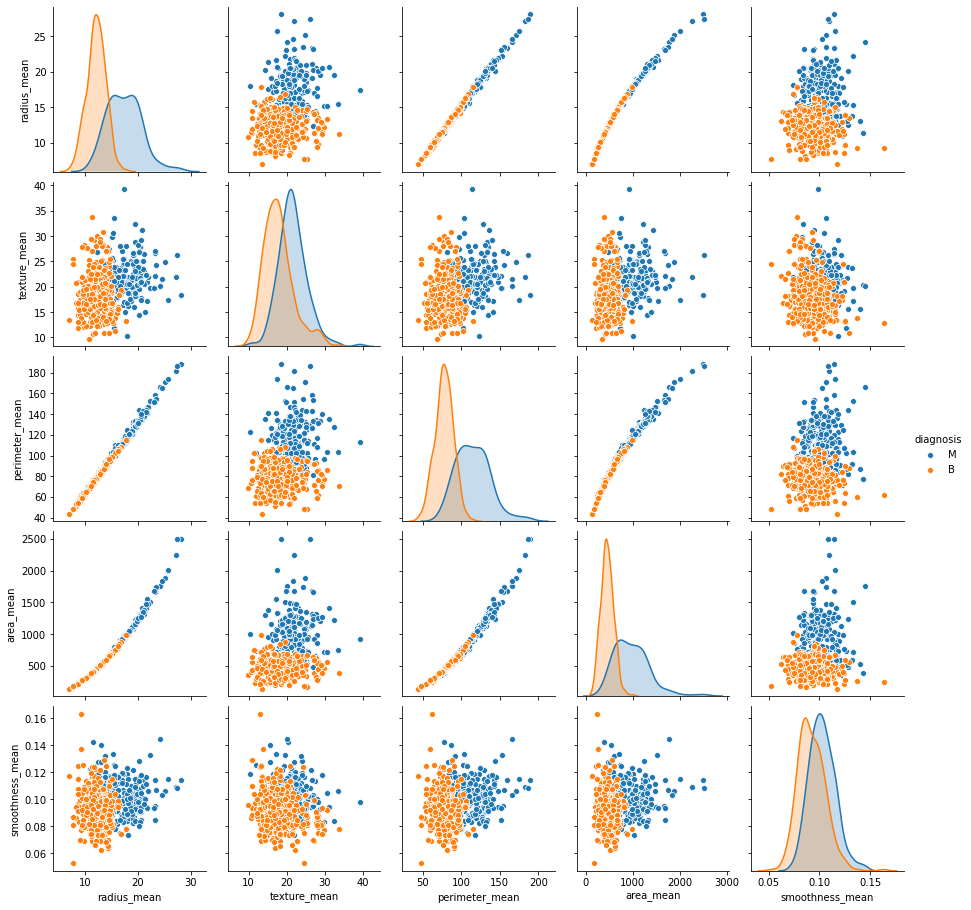

In [96]:
#Create a pair plot
sns.pairplot(df.iloc[:,1:7], hue = 'diagnosis')

In [97]:
#Get the correlation of the columns
df.iloc[:,1:12].corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000


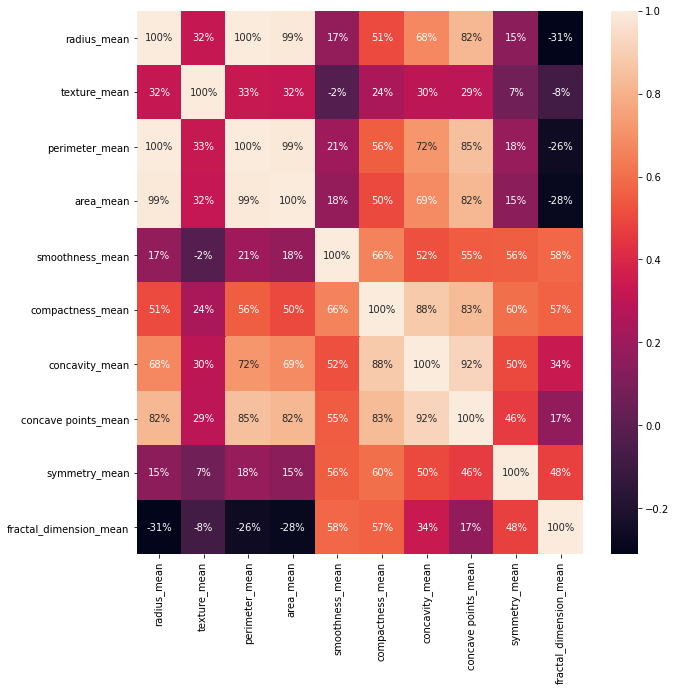

In [98]:
#Visualize the correlation
plt.figure(figsize=(10,10))
sns.heatmap(df.iloc[:,1:12].corr(), annot=True, fmt='.0%')

In [0]:
#Encode the catagorical data values
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
df.iloc[:,1] = labelencoder_Y.fit_transform(df.iloc[:,1].values)

In [0]:
#Split the data into Independent (X) and Dependent (Y) data sets
X = df.iloc[:,2:31].values
Y = df.iloc[:,1].values

In [0]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

In [0]:
#Scale the data (Feature Scaling)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [0]:
#Create a function for the models
def models(X_train, Y_train):

  #Fitting the Logistic Regression Algorithm to the Training Set
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state = 0)
  log.fit(X_train, Y_train)
  #95.8 Acuracy

  #Fitting K-NN Algorithm
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  knn.fit(X_train, Y_train)
 

  #Fitting SVM
  from sklearn.svm import SVC
  svm = SVC(kernel = 'linear', random_state = 0)
  svm.fit(X_train, Y_train) 
  

  #Fitting K-SVM
  from sklearn.svm import SVC
  ksvm = SVC(kernel = 'rbf', random_state = 0)
  ksvm.fit(X_train, Y_train)
 

  #Fitting Naive_Bayes
  from sklearn.naive_bayes import GaussianNB
  naive = GaussianNB()
  naive.fit(X_train, Y_train)


  #Fitting Decision Tree Algorithm
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, Y_train)
  

  #Fitting Random Forest Classification Algorithm
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest.fit(X_train, Y_train)
  

  #Print the models accuracy on the training data
  print('[0]Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
  print('[1]K-Nearest Neighbours Classifier Training Accuracy:', knn.score(X_train, Y_train))
  print('[2]Support Vector Machine Classifier Training Accuracy:', svm.score(X_train, Y_train))
  print('[3]K-Support Vector Machine Classifier Training Accuracy:', ksvm.score(X_train, Y_train))
  print('[4]Naive Bayes Training Accuracy:', naive.score(X_train, Y_train))
  print('[5]Decision Tree Training Accuracy:', tree.score(X_train, Y_train))
  print('[6]Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))

  return log, knn, svm, ksvm, naive, tree, forest

In [104]:
#Getting all of the models
model = models(X_train, Y_train)

[0]Logistic Regression Training Accuracy: 0.9912087912087912
[1]K-Nearest Neighbours Classifier Training Accuracy: 0.9802197802197802
[2]Support Vector Machine Classifier Training Accuracy: 0.9868131868131869
[3]K-Support Vector Machine Classifier Training Accuracy: 0.9846153846153847
[4]Naive Bayes Training Accuracy: 0.9494505494505494
[5]Decision Tree Training Accuracy: 1.0
[6]Random Forest Classifier Training Accuracy: 0.9978021978021978


In [106]:
#Test model accuracy on test data on confusion matrix
from sklearn.metrics import confusion_matrix

for i in range(len(model)):
  print('Model', i)
  cm = confusion_matrix(Y_test, model[i].predict(X_test))

  TP = cm[0][0]
  TN = cm[1][1]
  FN = cm[1][0]
  FP = cm[0][1]

  print(cm)
  print('Testing Accuracy =', (TP + TN)/ (TP + TN + FN + FP))
  print()

Model 0
[[66  1]
 [ 3 44]]
Testing Accuracy = 0.9649122807017544

Model 1
[[67  0]
 [ 4 43]]
Testing Accuracy = 0.9649122807017544

Model 2
[[65  2]
 [ 3 44]]
Testing Accuracy = 0.956140350877193

Model 3
[[67  0]
 [ 2 45]]
Testing Accuracy = 0.9824561403508771

Model 4
[[64  3]
 [ 4 43]]
Testing Accuracy = 0.9385964912280702

Model 5
[[64  3]
 [ 4 43]]
Testing Accuracy = 0.9385964912280702

Model 6
[[67  0]
 [ 3 44]]
Testing Accuracy = 0.9736842105263158



In [107]:
#Show another way to get metrics of the models
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

for i in range(len(model)):
  print('Model', i)
  print(classification_report(Y_test, model[i].predict(X_test)))
  print(accuracy_score(Y_test, model[i].predict(X_test)))
  print()

Model 0
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        67
           1       0.98      0.94      0.96        47

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

0.9649122807017544

Model 1
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        67
           1       1.00      0.91      0.96        47

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

0.9649122807017544

Model 2
              precision    recall  f1-score   support

           0       0.96      0.97      0.96        67
           1       0.96      0.94      0.95        47

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted a

In [108]:
#Print the prediction of Random Forest Classifier Model
pred = model[3].predict(X_test)
print(pred)
print()
print(Y_test)

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0
 1 1 0]

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0]
